<a href="https://colab.research.google.com/github/savg98/SebastianVelasquez/blob/main/trabajo_deivid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install selenium
!pip install webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 24.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
def scrape_tesla_stock():

    url = "https://finance.yahoo.com/quote/TSLA"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve data for Tesla.")
        return None

    tsla = yf.Ticker("TSLA")

    info = tsla.info

    print("Nombre:", info.get("shortName"))
    print("Precio actual:", info.get("currentPrice"))
    print("Cambio del día:", info.get("regularMarketChange"))
    print("Cambio porcentual:", info.get("regularMarketChangePercent"))
    print("Income: ", info.get("netIncomeToCommon"))

tesla_data = scrape_tesla_stock()
if tesla_data:
    print("Tesla Stock Data:")
    for key, value in tesla_data.items():
        print(f"{key}: {value}")

Nombre: Tesla, Inc.
Precio actual: 248.71
Cambio del día: 12.450012
Cambio porcentual: 5.2696238
Income:  7129999872


In [ ]:
def scrape_gamestop_stock():
    url = "https://finance.yahoo.com/quote/GME"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to retrieve data for GameStop.")
        return None

    game = yf.Ticker("GME")

    info = game.info


    print("Nombre:", info.get("shortName"))
    print("Precio actual:", info.get("currentPrice"))
    print("Cambio del día:", info.get("regularMarketChange"))
    print("Cambio porcentual:", info.get("regularMarketChangePercent"))
    print("Income: ", info.get("netIncomeToCommon"))

    soup = BeautifulSoup(response.text, "html.parser")

gamestop_data = scrape_gamestop_stock()
if gamestop_data:
    print("GameStop Stock Data:")
    for key, value in gamestop_data.items():
        print(f"{key}: {value}")


Nombre: GameStop Corporation
Precio actual: 24.75
Cambio del día: 1.24
Cambio porcentual: 5.27435
Income:  63100000


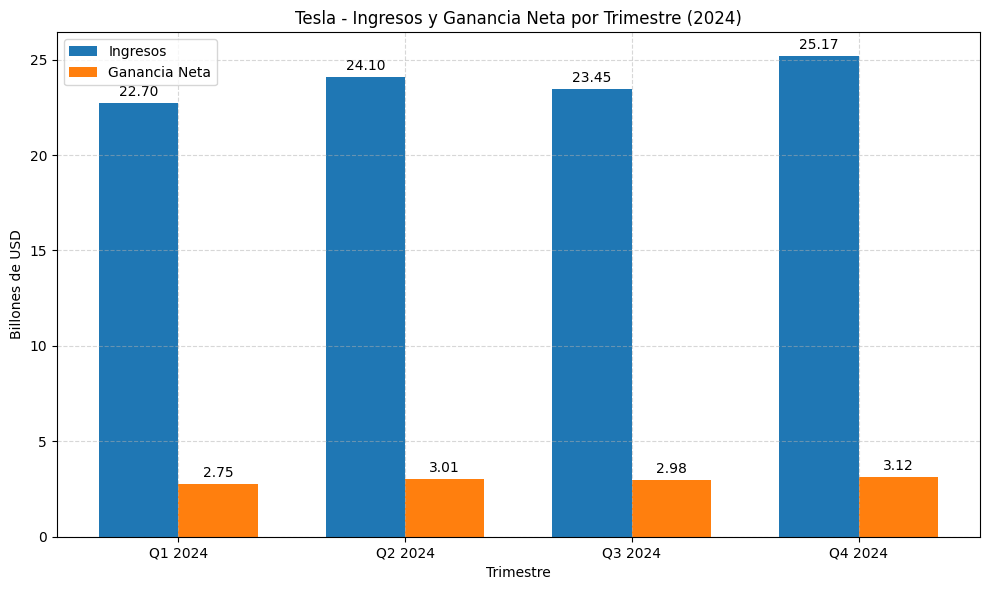

In [ ]:
data = {
    "Trimestre": ["Q1 2024", "Q2 2024", "Q3 2024", "Q4 2024"],
    "Ingresos (B)": [22.7, 24.1, 23.45, 25.17],
    "Ganancia Neta (B)": [2.75, 3.01, 2.98, 3.12]
}

df = pd.DataFrame(data)

x = range(len(df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar([i - width/2 for i in x], df["Ingresos (B)"], width, label="Ingresos")
bars2 = ax.bar([i + width/2 for i in x], df["Ganancia Neta (B)"], width, label="Ganancia Neta")

ax.set_xlabel("Trimestre")
ax.set_ylabel("Billones de USD")
ax.set_title("Tesla - Ingresos y Ganancia Neta por Trimestre (2024)")
ax.set_xticks(x)
ax.set_xticklabels(df["Trimestre"])
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


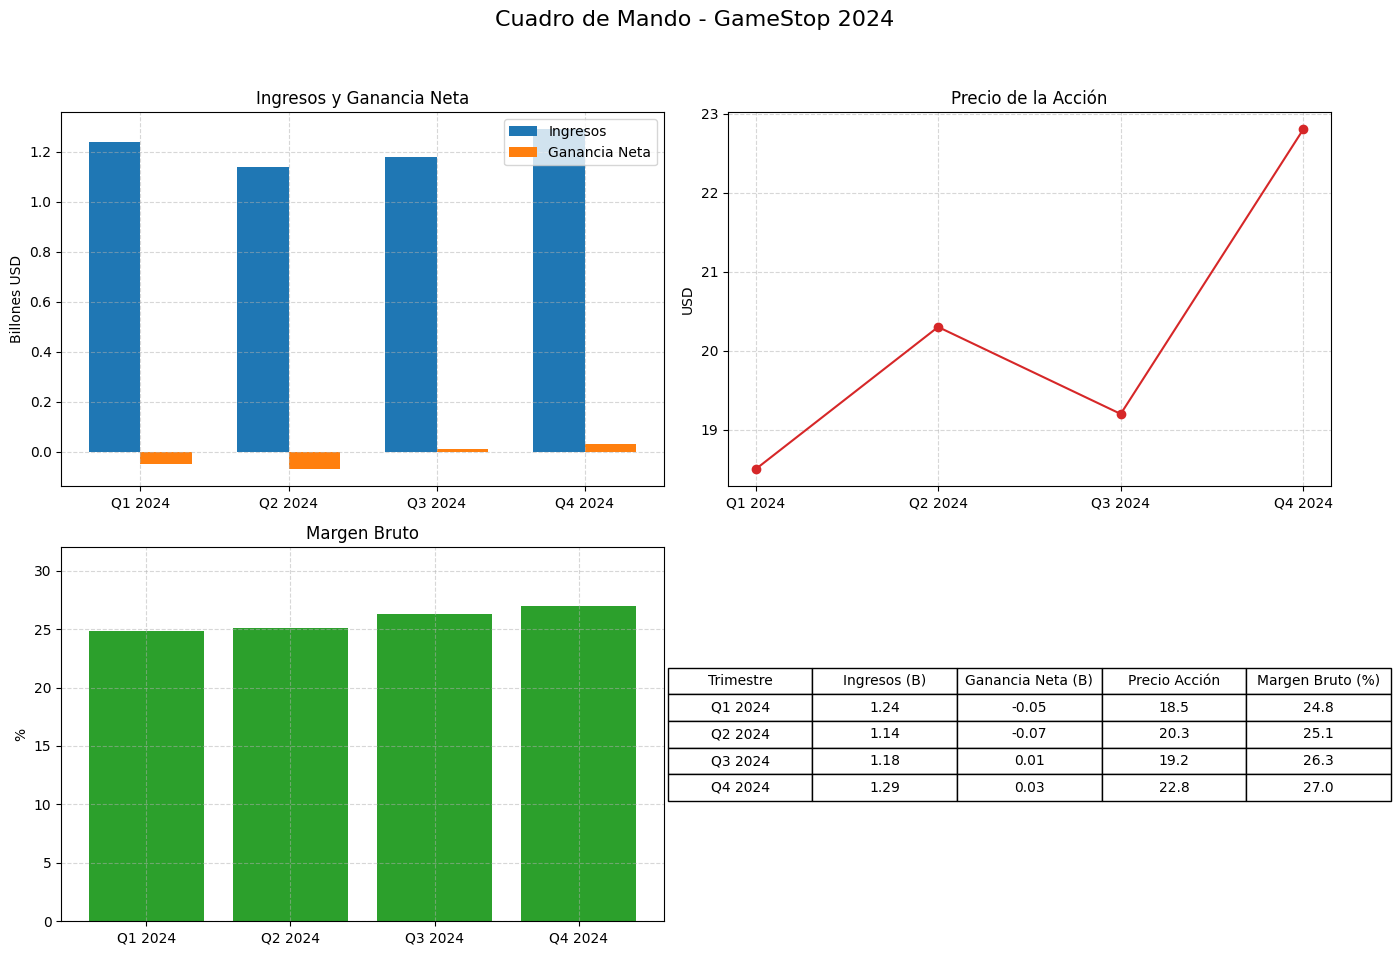

In [ ]:
trimestres = ["Q1 2024", "Q2 2024", "Q3 2024", "Q4 2024"]
ingresos = [1.24, 1.14, 1.18, 1.29]
ganancia_neta = [-0.05, -0.07, 0.01, 0.03]
precio_accion = [18.5, 20.3, 19.2, 22.8]
margen_bruto = [24.8, 25.1, 26.3, 27.0]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Cuadro de Mando - GameStop 2024", fontsize=16)

x = np.arange(len(trimestres))
width = 0.35
axs[0, 0].bar(x - width/2, ingresos, width, label='Ingresos')
axs[0, 0].bar(x + width/2, ganancia_neta, width, label='Ganancia Neta')
axs[0, 0].set_title("Ingresos y Ganancia Neta")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(trimestres)
axs[0, 0].set_ylabel("Billones USD")
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle="--", alpha=0.5)

axs[0, 1].plot(trimestres, precio_accion, marker='o', linestyle='-', color='tab:red')
axs[0, 1].set_title("Precio de la Acción")
axs[0, 1].set_ylabel("USD")
axs[0, 1].grid(True, linestyle="--", alpha=0.5)

axs[1, 0].bar(trimestres, margen_bruto, color='tab:green')
axs[1, 0].set_title("Margen Bruto")
axs[1, 0].set_ylabel("%")
axs[1, 0].set_ylim(0, max(margen_bruto) + 5)
axs[1, 0].grid(True, linestyle="--", alpha=0.5)

axs[1, 1].axis('off')
tabla_data = list(zip(trimestres, ingresos, ganancia_neta, precio_accion, margen_bruto))
column_labels = ["Trimestre", "Ingresos (B)", "Ganancia Neta (B)", "Precio Acción", "Margen Bruto (%)"]
table = axs[1, 1].table(cellText=tabla_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
